## Week 4:

New Topics:

* Reading data from Excel
* `geopandas` and choropleths
  
 Coding tasks:
  
  1. Create a choropleth showing the unemployment rate per county for each Tennessee county.
  2. Create a choropleth showing the SHADAC category for each county (adequate, low inadequate, and moderately inadequate).
  3. After creating the choropleth, you can start working on addressing the first two questions for TN Med Helper described in the project README. There are a few files in the data folder that can be helpful for this:
  * Medicare_Disparities_by_Population - This folder contains data obtained from the [Centers for Medicare and Medicaid Services](https://data.cms.gov/tools/mapping-medicare-disparities-by-population), as described in the README.
  * County_Health_Rankings - This folder contains the [2020 County Health Rankings](https://www.countyhealthrankings.org/).
  * Closures-Database-for-Web.xlsx, which contains a dataset of rural hospital closures, obtained from [UNC's Sheps Center](https://www.shepscenter.unc.edu/programs-projects/rural-health/rural-hospital-closures/). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [59]:
# Read in data files
physicians = pd.read_csv('../data/primary_care_physicians.csv')
physicians.head()
population = pd.read_csv('../data/population_by_county.csv')
physicians = physicians.loc[physicians['state'] == 'Tennessee']

# Correct column variables and merge data files; create new coluumn for residents per pcp
population['county'].str.split(' County', expand = True)
population['county']=population['county'].str.split(' County', expand = True)[0]
population = population.loc[population['state'] == 'TENNESSEE']
physicians = pd.merge(left = physicians,
         right = population[['county','population', 'urban']])
physicians['residents_per_pcp'] = physicians['population'] / physicians['primary_care_physicians']

# Create categories for level of care
# Use .loc to add column, picks the new shadac category based on value in 'residents_per_pcp'
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

# Merge unemployment data frame on 'County'
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment['Name'].str.split(' County', expand = True)
unemployment['Name'] = unemployment['Name'].str.split(' County', expand = True)[0]
physicians = pd.merge(left = physicians,
         right = unemployment.rename(columns = {'Name': 'county'}))


1. Create a choropleth showing the unemployment rate per county for each Tennessee county.

In [60]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [66]:
physicians = physicians[['county','primary_care_physicians','population','urban','residents_per_pcp','shadac_category',
                         'unemployment_rate']]
counties = counties.rename(columns = {'NAME': 'county'})
counties = pd.merge(left = counties,
                    right = physicians)

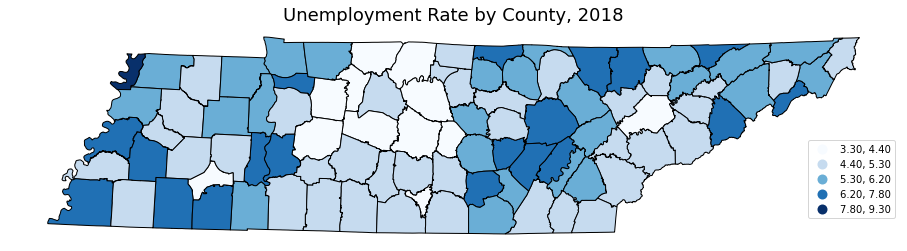

In [68]:
fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'unemployment_rate', 
              edgecolor = 'black', 
              legend = True,
              cmap = 'Blues',
              scheme="NaturalBreaks",
              ax = ax)

# Position the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Add a title
plt.title('Unemployment Rate by County, 2018', fontsize = 18)

ax.axis('off');

2. Create a choropleth showing the SHADAC category for each county (adequate, low inadequate, and moderately inadequate).

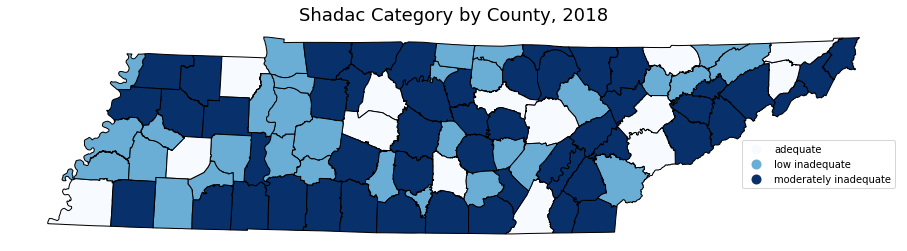

In [70]:
fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'shadac_category', 
              edgecolor = 'black', 
              legend = True,
              cmap = 'Blues',
              ax = ax)

# Position the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Add a title
plt.title('Shadac Category by County, 2018', fontsize = 18)

ax.axis('off');

3. After creating the choropleth, you can start working on addressing the first two questions for TN Med Helper described in the project README. There are a few files in the data folder that can be helpful for this:
  * Medicare_Disparities_by_Population - This folder contains data obtained from the [Centers for Medicare and Medicaid Services](https://data.cms.gov/tools/mapping-medicare-disparities-by-population), as described in the README.
  * County_Health_Rankings - This folder contains the [2020 County Health Rankings](https://www.countyhealthrankings.org/).
  * Closures-Database-for-Web.xlsx, which contains a dataset of rural hospital closures, obtained from [UNC's Sheps Center](https://www.shepscenter.unc.edu/programs-projects/rural-health/rural-hospital-closures/). 

### Data Science Essentials 4

**TN Med Helper** is a fictional company whose mission is to ensure access to healthcare for all Tennesseans. TN Med Helper has approached your data science consultancy for help identifying communities in Tennessee that need the most help in expanding access to healthcare.

In this project, we will use the [Medicare Disparities](https://data.cms.gov/mapping-medicare-disparities) data as a starting point for identifying such communities. Specifically, you will be provided with datasets containing the percent of Medicare beneficiaries who had an annual wellness visit (annual_wellness.csv), the number of all-cause hospitilizations per 1000 beneficiaries (hospitalizations.csv), and the number of emergency department visits per 1000 beneficiaries (emergency_department.csv). Over the next 8 weeks, you will work towards addressing the following three objectives.

First, TN Med Helper is concerned about communities either lacking access to healthcare or losing access to healthcare. They are looking to expand telehealth technologies into the vulnerable communities, and need your help to priortize areas most needing attention. your first objective is to identify which counties in Tennessee have the most severe lack of access to healthcare (either due to lack of hospitals, physicians, or both). Once you have identified these counties, see if you can find any common demographic or economic characteristics for these areas.

Second, TN Med Helper is interested in reducing the number of potentially preventable hospitalizations. Do areas that lack access to healthcare tend to have higher rates of emergency department visits or hospitalizations? Is there an association between the percentage of beneficiaries who had an annual wellness visit and rate of hospitalizations or emergency department visits?